In [2]:
pip install Pillow

  Using cached pillow-10.4.0-cp312-cp312-macosx_10_10_x86_64.whl.metadata (9.2 kB)
Using cached pillow-10.4.0-cp312-cp312-macosx_10_10_x86_64.whl (3.5 MB)
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install matplotlib

  Using cached matplotlib-3.9.2-cp312-cp312-macosx_10_12_x86_64.whl.metadata (11 kB)
  Using cached contourpy-1.3.0-cp312-cp312-macosx_10_9_x86_64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.54.1-cp312-cp312-macosx_10_13_universal2.whl.metadata (163 kB)
  Using cached kiwisolver-1.4.7-cp312-cp312-macosx_10_9_x86_64.whl.metadata (6.3 kB)
  Using cached numpy-2.1.1-cp312-cp312-macosx_10_9_x86_64.whl.metadata (60 kB)
  Using cached pyparsing-3.1.4-py3-none-any.whl.metadata (5.1 kB)
Using cached matplotlib-3.9.2-cp312-cp312-macosx_10_12_x86_64.whl (7.9 MB)
Using cached contourpy-1.3.0-cp312-cp312-macosx_10_9_x86_64.whl (267 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.54.1-cp312-cp312-macosx_10_13_universal2.whl (2.8 MB)
Using cached kiwisolver-1.4.7-cp312-cp312-macosx_10_9_x86_64.whl (65 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 2.7 MB/s eta 0:00:0000:0100:01
Using 

In [6]:
import os
import json
from PIL import Image
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [22]:
metadata_folder = '/Users/xinyi/OneDrive/Projects/IngreWiz/Yummly28K/metadata27638'
images_folder = '/Users/xinyi/OneDrive/Projects/IngreWiz/Yummly28K/images27638'

def load_data(image_id):
    # Load metadata from JSON file
    meta_file = os.path.join(metadata_folder, f"meta{image_id}.json")
    with open(meta_file, 'r') as f:
        metadata = json.load(f)
    
    # Load image
    img_file = os.path.join(images_folder, f"img{image_id}.jpg")
    image = Image.open(img_file)
    
    return metadata, image

# Function to visualize the image
def display_image(image_id):
    metadata, image = load_data(image_id)
    
    plt.figure(figsize=(2.5, 2.5))
    plt.imshow(image)
    plt.axis('off')  # Turn off axis
    plt.title(f'Image ID: {image_id}')  # Optional title
    plt.show()

# Function to display JSON metadata
def display_metadata(image_id):
    metadata, _ = load_data(image_id)
    
    # Print JSON in a readable format
    print(json.dumps(metadata, indent=2))



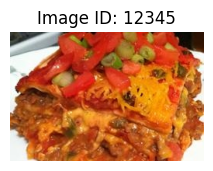

In [23]:
image_id = '12345'  # Replace with your image ID
display_image(image_id)  # Display the image

In [24]:
display_metadata(image_id)  # Display the metadata

{
  "totalTime": "55 Min",
  "ingredientLines": [
    "1 pound lean ground beef",
    "1 (1.25 ounce) package taco seasoning mix",
    "2 (16 ounce) cans refried beans",
    "4 (10 inch) flour tortillas",
    "3 cups shredded Cheddar cheese",
    "2 green onions, chopped",
    "2 roma (plum) tomatoes, chopped"
  ],
  "attribution": {
    "url": "http://www.yummly.com/recipe/Mexican-Lasagna-Ii-Allrecipes",
    "text": "Mexican Lasagna II recipes: information powered by Yummly",
    "html": "<a href='http://www.yummly.com/recipe/Mexican-Lasagna-Ii-Allrecipes'>Mexican Lasagna II recipe</a> information powered by <img alt='Yummly' src='http://static.yummly.com/api-logo.png'/>",
    "logo": "http://static.yummly.com/api-logo.png"
  },
  "name": "Mexican Lasagna II",
  "prepTimeInSeconds": 300,
  "rating": 4,
  "cookTimeInSeconds": 2700,
  "numberOfServings": 9,
  "yield": "1 9x13 inch baking dish",
  "nutritionEstimates": [
    {
      "attribute": "FAT_KCAL",
      "unit": {
        "name"

In [25]:
meta_file = "/Users/xinyi/OneDrive/Projects/IngreWiz/Yummly28K/metadata27638/meta00001.json"
with open(meta_file, 'r') as f:
        metadata = json.load(f)

name = metadata.get('name')  
print(name)


Mushroom Risotto


In [ ]:
# Load model directly
from transformers import AutoImageProcessor, AutoModelForImageClassification

processor = AutoImageProcessor.from_pretrained("Kaludi/Food-Classification")
model = AutoModelForImageClassification.from_pretrained("Kaludi/Food-Classification")

In [ ]:
from transformers import Trainer, TrainingArguments

training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=3,
    weight_decay=0.01,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
)

trainer.train()


In [ ]:
trainer.evaluate()
model.save_pretrained("path_to_save_model")
